In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import matplotlib 
from PIL import Image
import PIL
import math
from random import random
from random import seed
from random import randint
import time
from numba import jit
from scipy import ndimage, misc
import scipy.stats as stats

In [172]:
# Comoving but the strings will disappear

@jit(nopython = True)
def Laplacian(A,deltax,deltat):

    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions            
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            P[i,j] = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j] \
                 -A[i,(j+2)%h] + 16*A[i,(j+1)%h]  + 16*A[i,(j-1)%h] -A[i,(j-2)%h] - 60*A[i,j])/(12*pow(deltax,2))

  
    return P 



def update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time):
    a1 = c_1 * time ** (2/3) + c_2*(np.exp(time/c_3)-1)
    deltaa = a1-a
    da_dt_a = deltaa/deltat/a1 

    lam = 2*pow(math.pi,2)/pow(omega,2)

    F1 = Laplacian(A1,deltax,deltat) - lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2))-3*da_dt_a*vel1 
    F2 = Laplacian(A2,deltax,deltat) - lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2))-3*da_dt_a*vel2
    
    time = time + deltat
    
    a2 = c_1 * time ** (2/3) + c_2*(np.exp(time/c_3)-1)
    deltaa = a2-a1
    da_dt_a = deltaa/deltat/a2 
    
    
    A1 = A1 + deltat*(vel1 + 0.5*deltat*F1) 
    A2 = A2 + deltat*(vel2 + 0.5*deltat*F2) 
    

    
    vel1 = vel1 + deltat/2*(F1 + Laplacian(A1,deltax,deltat) - lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -3*da_dt_a*vel1) 
    vel2 = vel2 + deltat/2*(F2 + Laplacian(A2,deltax,deltat) - lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -3*da_dt_a*vel2)
    
    
    return A1,A2,vel1,vel2,a1,time
    
#change the values accordlingly    
def wolff(N,t0,t,A1,A2,vel,omega,eta,deltax,deltat):

    time = t0
    pA1 = np.zeros((N,N))
    pA2 = np.zeros((N,N))
    vel1 = vel
    vel2 = vel
    a = 1.71541177447862e-5 * time ** (0.2530363118519119)


    for i in np.arange(int(t/deltat)):
        time = round(time,1)
        
        if time % 1 == 0:

        
            #plt.imsave('1259/'+str(int(time)).zfill(3)+'.png',np.sqrt(pow(A1,2)+pow(A2,2)),vmin = 0, vmax = eta,cmap = 'Greys')
            plt.imsave('1262/'+str(int(time)).zfill(3)+'.png',np.arctan2(A2,A1),vmin = -1*math.pi, vmax = math.pi,cmap = 'twilight')

        A1,A2,vel1,vel2,a,time = update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time)


    return A1,A2

In [91]:
# comoving but the strings stay put (non-ideal)

@jit(nopython = True)
def Laplacian(A,deltax,deltat):

    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions            
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            P[i,j] = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j] \
                 -A[i,(j+2)%h] + 16*A[i,(j+1)%h]  + 16*A[i,(j-1)%h] -A[i,(j-2)%h] - 60*A[i,j])/(12*pow(deltax,2))

  
    return P 



def update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time):
    H_0 = 2.18e-18
    c_1 = 0.822
    c_2 = 0.0623
    c_3 = 0.645

    a1 = 2.93282351932618e-37 * time **2
    beta = 0
    alpha = 3
    ln_da_dt = 2
    
    lam = 2*pow(math.pi,2)/pow(omega,2)
    

    
    F1 = Laplacian(A1,deltax,deltat) - a1**beta * lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*ln_da_dt*vel1
    F2 = Laplacian(A2,deltax,deltat) - a1**beta * lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*ln_da_dt*vel2
    
    time = time + deltat
    
    a2 = 2.93282351932618e-37 * time **2
    
    A1 = A1 + deltat*(vel1 + 0.5*deltat*F1) 
    A2 = A2 + deltat*(vel2 + 0.5*deltat*F2) 

    
    vel1 = vel1 + deltat/2*(F1 + Laplacian(A1,deltax,deltat) - a2**beta *lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -alpha*ln_da_dt*vel1) 
    vel2 = vel2 + deltat/2*(F2 + Laplacian(A2,deltax,deltat) - a2**beta *lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -alpha*ln_da_dt*vel2)
    
    
    return A1,A2,vel1,vel2,a1,time
    
#change the values accordlingly    
def wolff(N,t0,t,A1,A2,vel,omega,eta,deltax,deltat):
    
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    H_0 = 2.18e-18
    time = t0

    vel1 = vel
    vel2 = vel
    
    c_1 = 0.822
    c_2 = 0.0623
    c_3 = 0.645
    a = c_1 * (time*H_0) ** (2/3) + c_2*(np.exp((time*H_0)/c_3)-1)
    npix = A1.shape[0]
    kfreq = np.fft.fftfreq(npix)*npix
    kfreq2D = np.meshgrid(kfreq,kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    kbins = np.arange(0.5,npix//2 + 1,1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    

    for i in np.arange(int(t/deltat)):
        time = round(time,3)
        
        if time % 10 == 0:

            mod = np.sqrt(pow(A1,2)+pow(A2,2))
        
            #plt.imsave('111/'+str(int(time)).zfill(3)+'.png',np.sqrt(pow(A1,2)+pow(A2,2)),vmin = 0, vmax = eta,cmap = 'Greys')
            #plt.imsave('313/'+str(int(time)).zfill(3)+'.png',np.arctan2(A2,A1),vmin = -1*math.pi, vmax = math.pi,cmap = 'twilight')
             
            f_image = np.fft.fftn(mod)
            f_amp = np.abs(f_image)**2
            f_amp = f_amp.flatten()
            Abins, _, _ = stats.binned_statistic(knrm,f_amp, statistic = "mean", bins = kbins)
            Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
            plt.loglog(kvals,Abins)
            plt.xlabel("k")
            plt.ylabel("P(k)")
            plt.xlim([1e-1,1e3])
            plt.ylim([1e2,1e8])
            
            plt.savefig('314/'+str(int(time)).zfill(3)+'.png', bbox_inches= 'tight')
            plt.clf()

            
        A1,A2,vel1,vel2,a,time = update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time)


    return A1,A2

In [101]:
# comoving but the strings stay put (ideal for radiation or matter)

@jit(nopython = True)
def Laplacian(A,deltax,deltat):

    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions            
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            P[i,j] = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j] \
                 -A[i,(j+2)%h] + 16*A[i,(j+1)%h]  + 16*A[i,(j-1)%h] -A[i,(j-2)%h] - 60*A[i,j])/(12*pow(deltax,2))

  
    return P 



def update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time):
    H_0 = 2.18e-18
    #a = np.sqrt(2*H_0)*np.sqrt(time)
    #a = H_0 ** (2/3) * time ** (2/3)
    a = 4.36000000000006e-18 * time - 6.78288102293483e-23 
    beta = 0
    alpha = 3
    era = 1 #radiation
    #era = 2 #matter
    

    lam = 2*pow(math.pi,2)/pow(omega,2)
    

    
    F1 = Laplacian(A1,deltax,deltat) - a**beta * lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*era*vel1
    F2 = Laplacian(A2,deltax,deltat) - a**beta * lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*era*vel2
    
    time = time + deltat
    
    a1 = 4.36000000000006e-18 * time - 6.78288102293483e-23 
    
    

    
    A1 = A1 + deltat*(vel1 + 0.5*deltat*F1) 
    A2 = A2 + deltat*(vel2 + 0.5*deltat*F2) 

    
    vel1 = vel1 + deltat/2*(F1 + Laplacian(A1,deltax,deltat) - a1**beta *lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2)) \
                                   -alpha*era*vel1)
    vel2 = vel2 + deltat/2*(F2 + Laplacian(A2,deltax,deltat) - a1**beta *lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) \
                                  -alpha*era*vel2)
    
    
    return A1,A2,vel1,vel2,a,time
    
#change the values accordlingly    
def wolff(N,t0,t,A1,A2,vel,omega,eta,deltax,deltat):
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')

    time = t0
    a = 0

    vel1 = vel
    vel2 = vel
    
    npix = A1.shape[0]
    kfreq = np.fft.fftfreq(npix)*npix
    kfreq2D = np.meshgrid(kfreq,kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    kbins = np.arange(0.5,npix//2 + 1,1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])


    for i in np.arange(int(t/deltat)):
        time = round(time,3)
        
        if time % 5 == 0:
            mod = np.sqrt(pow(A1,2)+pow(A2,2))
        

        
            #plt.imsave('112/'+str(int(time)).zfill(3)+'.png',np.sqrt(pow(A1,2)+pow(A2,2)),vmin = 0, vmax = eta,cmap = 'Greys')
            #plt.imsave('311/'+str(int(time)).zfill(3)+'.png',np.arctan2(A2,A1),vmin = -1*math.pi, vmax = math.pi,cmap = 'twilight')
            f_image = np.fft.fftn(mod)
            f_amp = np.abs(f_image)**2
            f_amp = f_amp.flatten()
            Abins, _, _ = stats.binned_statistic(knrm,f_amp, statistic = "mean", bins = kbins)
            Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
            plt.loglog(kvals,Abins)
            plt.xlabel("k")
            plt.ylabel("P(k)")
            plt.xlim([1e-1,1e3])
            plt.ylim([1e2,1e8])
            
            plt.savefig('314/'+str(int(time/5)).zfill(3)+'.png', bbox_inches= 'tight')
            plt.clf()
            
        A1,A2,vel1,vel2,a,time = update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time)


    return A1,A2

In [ ]:

#2.93282351932618e-37 * x**2 , imp
# 4.75240000000367e-36 * x**2, matter
# 4.36000000000006e-18 * x - 6.78288102293483e-23 , rad

In [ ]:
start = time.time()
plt.close()

n = 9
deltax = 1
deltat = 0.1
eta = 1
N = pow(2,n)
t = 0.5*N*deltax/deltat # light crossing time
t0 = 0.1
t2 = t/2 # half time
t5 = t/5
t10 = t/10 # 1/10 of the ligth crossing time

vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5

print(t)



A1 = np.random.normal(mu, sigma, size=(N, N))
A2 = np.random.normal(mu,sigma,size=(N,N))

A1,A2 = wolff(N,t0,t5,A1,A2,vel,omega,eta,deltax,deltat)

end = time.time()
print(end - start)

2560.0


In [55]:
start = time.time()


n = 9
deltax = 1
deltat = 0.1
eta = 1
N = pow(2,n)
t = 0.5*N*deltax/deltat # light crossing time
t0 = 0.1
t2 = t/2 # half time
t5 = t/5
t10 = t/10 # 1/10 of the ligth crossing time

vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5

print(t)



A1 = np.random.normal(mu, sigma, size=(N, N))
A2 = np.random.normal(mu,sigma,size=(N,N))

A1,A2 = wolff(N,t0,t5,A1,A2,vel,omega,eta,deltax,deltat)

end = time.time()
print(end - start)

2560.0
275.56834268569946


In [5]:
Laplacian(np.zeros((10,10)),1,0.1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
import scipy.integrate as integrate

import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

result

(1.1178179380783253, 7.866317216380692e-09)

In [29]:
H_0 = 2.18e-18
omega_r = 9.24e-5
omega_m = 0.315
omega_lambda = 0.685
omega_k = 0
time = []
Hubble = []
a = np.linspace(1e-6,1,50000)
a = np.around(a,7)

                         
for i in range(0,len(a)):
    H = H_0 * np.sqrt(omega_r * pow(a[i],-4) + omega_m * pow(a[i],-3) + omega_k * pow(a[i],-2) + omega_lambda)
    integrand = lambda x: x/(np.sqrt(omega_r + omega_m * x + omega_k * pow(x,2) + omega_lambda * pow(x,4)))
    t= integrate.quad(integrand,0,a[i])
    time.append(t[0]/H_0)
    Hubble.append(H)

4.3604709253160166e+17


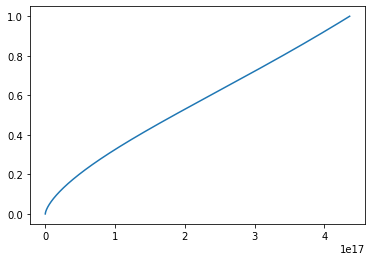

In [30]:
plt.plot(time,a)
print(time[-1])


4.5871559633027526e+17


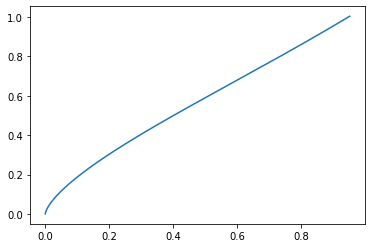

In [89]:
c_1 = 0.822
c_2 = 0.0623
c_3 = 0.645
H_0 = 2.18e-18
print(1/H_0)
x = np.linspace(1e-6,4.3604709253160166e+17,500000)*H_0
y = c_1 * x ** (2/3) + c_2*(np.exp(x/c_3)-1)
plt.plot(x,y)

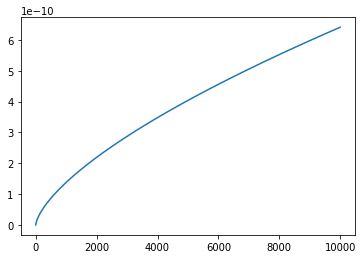

In [104]:
H_0 = 2.18e-18
c_1 = 0.822
c_2 = 0.0623
c_3 = 0.645
H_0 = 2.18e-18

x = np.linspace(1e-6,10000,500000)
y = c_1 * (x*H_0) ** (2/3) + c_2*(np.exp((x*H_0)/c_3)-1)
plt.plot(x,y)

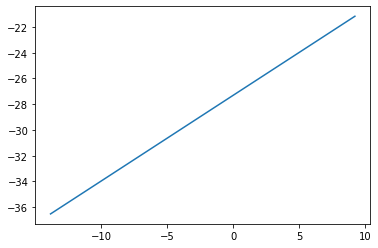

In [105]:
ln_x = np.log(x)
ln_y = np.log(y)
plt.plot(ln_x,ln_y)
#gradient = 0.666667285959397

In [106]:
dict = {'ln(x)': ln_x,'ln(y)': ln_y}
df = pd.DataFrame(dict)
df.to_csv('Log.csv')

In [32]:
import pandas as pd

dict = {'time (t)': time, 'Scale factor (a)': a, 'Hubble Parameter (H)': Hubble}
df = pd.DataFrame(dict)
df.to_csv('Integrations.csv')

In [52]:
@jit(nopython = True)
def Laplacian(A,deltax,deltat):

    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions            
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            P[i,j] = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j] \
                 -A[i,(j+2)%h] + 16*A[i,(j+1)%h]  + 16*A[i,(j-1)%h] -A[i,(j-2)%h] - 60*A[i,j])/(12*pow(deltax,2))

  
    return P 



def update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time):
    H_0 = 2.18e-18
    #a = np.sqrt(2*H_0)*np.sqrt(time)
    a = 4.75240000000367e-36 * time**2
    beta = 0
    alpha = 3
    #era = 1 #radiation
    era = 2 #matter

    lam = 2*pow(math.pi,2)/pow(omega,2)
    

    
    F1 = Laplacian(A1,deltax,deltat) - a**beta * lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*era*vel1
    F2 = Laplacian(A2,deltax,deltat) - a**beta * lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*era*vel2
    
    time = time + deltat
    
    a1 = 4.75240000000367e-36 * time**2

    
    A1 = A1 + deltat*(vel1 + 0.5*deltat*F1) 
    A2 = A2 + deltat*(vel2 + 0.5*deltat*F2) 

    
    vel1 = vel1 + deltat/2*(F1 + Laplacian(A1,deltax,deltat) - a1**beta *lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -alpha*era*vel1) 
    vel2 = vel2 + deltat/2*(F2 + Laplacian(A2,deltax,deltat) - a1**beta *lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -alpha*era*vel2)
    
    
    return A1,A2,vel1,vel2,a,time
    
#change the values accordlingly    
def wolff(N,t0,t,A1,A2,vel,omega,eta,deltax,deltat):

    time = t0
    a = 0

    vel1 = vel
    vel2 = vel


    for i in np.arange(int(t/deltat)):
        time = round(time,3)
        
        if time % 1 == 0:

        
            #plt.imsave('113/'+str(int(time)).zfill(3)+'.png',np.sqrt(pow(A1,2)+pow(A2,2)),vmin = 0, vmax = eta,cmap = 'Greys')
            plt.imsave('312/'+str(int(time)).zfill(3)+'.png',np.arctan2(A2,A1),vmin = -1*math.pi, vmax = math.pi,cmap = 'twilight')

        A1,A2,vel1,vel2,a,time = update(N,A1,A2,vel1,vel2,omega,eta,deltax,deltat,a,time)


    return A1,A2

In [53]:
start = time.time()


n = 9
deltax = 1
deltat = 0.1
eta = 1
N = pow(2,n)
t = 0.5*N*deltax/deltat # light crossing time
t0 = 0.1
t2 = t/2 # half time
t5 = t/5
t10 = t/10 # 1/10 of the ligth crossing time

vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5

print(t)



A1 = np.random.normal(mu, sigma, size=(N, N))
A2 = np.random.normal(mu,sigma,size=(N,N))

A1,A2 = wolff(N,t0,t5,A1,A2,vel,omega,eta,deltax,deltat)

end = time.time()
print(end - start)

2560.0
289.16619634628296


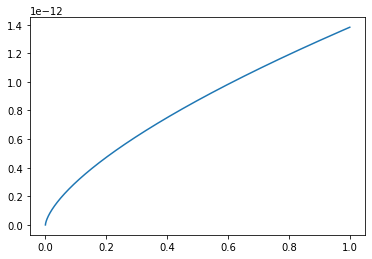

In [25]:
H_0 = 2.18e-18
c_1 = 0.822
c_2 = 0.0623
c_3 = 0.645

time = np.linspace(1e-6,1,10000)

y_1 = c_1 * (time*H_0) ** (2/3) + c_2*(np.exp((time*H_0)/c_3)-1)
y_2 = H_0 ** (2/3) * time ** (2/3)
y_3 = np.sqrt(2*H_0)*np.sqrt(time)
plt.plot(time,y_1)


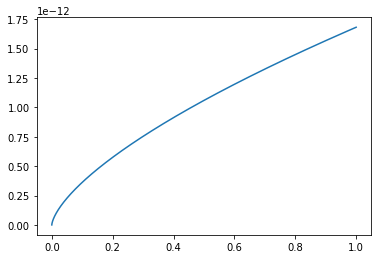

In [98]:
plt.plot(time,y_2)


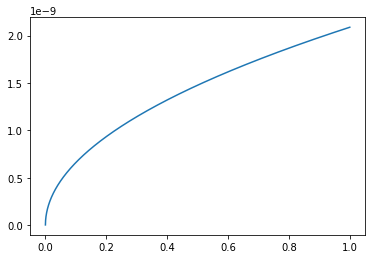

In [99]:
plt.plot(time,y_3)

In [ ]:
y_1 = c_1 * (time*H_0) ** (2/3) + c_2*(np.exp((time*H_0)/c_3)-1)
y_2 = H_0 ** (2/3) * time ** (2/3)
y_3 = np.sqrt(2*H_0)*np.sqrt(time)

In [41]:
H_0 = 2.18e-18
omega_r = 9.24e-5
omega_m = 0.315
omega_lambda = 0.685
omega_k = 0
scalefac = []
conformal = []
t = np.linspace(1e-6,20,50000)
t = np.around(t,7)



                         
for i in range(0,len(t)):
    scalefac.append(np.sqrt(2*H_0)*np.sqrt(t[i]))
    integrand = lambda x: 1/(np.sqrt(2*H_0)*np.sqrt(t[i]))
    r= integrate.quad(integrand,1e-19,t[i])
    conformal.append(r[0])


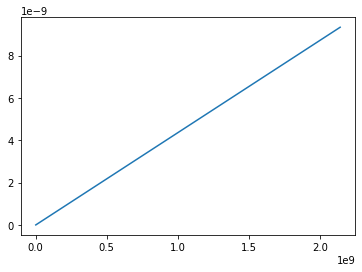

In [42]:
plt.plot(conformal,scalefac)

In [43]:
import pandas as pd
dict = {'eta': conformal,'a': scalefac}
df = pd.DataFrame(dict)
df.to_csv('confa.csv')


#2.93282351932618e-37 * x**2 , imp
# 4.75240000000367e-36 * x**2, matter
# 4.36000000000006e-18 * x - 6.78288102293483e-23 , rad

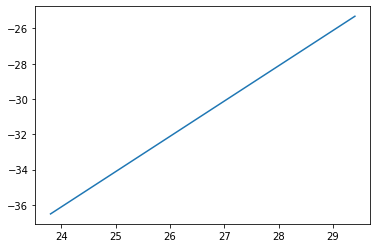

In [133]:
ln_sca = np.log(scalefac)
ln_con = np.log(conformal)
plt.plot(ln_con,ln_sca)
#rad = gradient is 1
#mat = gradient is 2
#imp = gradient is 2

In [134]:
dict = {'ln(eta)': ln_con,'ln(a)': ln_sca}
df = pd.DataFrame(dict)
df.to_csv('conf.csv')